### Let's start te visualizatioooooonnnnnnssssss

In [1]:
# Manual selection of supposedly violent categories

from empath import Empath
lexicon = Empath()

violent_categories = ["hate", "aggression", "occupation", "crime", "prison", "dispute", "nervousness", "horror", 
              "swearing_terms", "suffering", "kill", "fear", "death", "violence", "dominant_heirarchical", 
              "neglect", "monster", "weapon", "negative_emotion", "pain", "terrorism", "breaking", 
              "disappointment", "anger", "torment", "shame", "emotional", "sadness",
              "rage", "injury", "fire", "disgust", "war", "dominant_personality",
              "fight", "deception",]

# If we want to manually inspect the categories
""" for category in categories: 
    print("Category =" + category, lexicon.cats.get(category)) """

' for category in categories: \n    print("Category =" + category, lexicon.cats.get(category)) '

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

empath_df = pd.read_csv('../data/CLEAN/empath_features_matrix.tsv', sep="\t", index_col=0) # index_col sinon il traîte la première colonne comme une colonne, et pas comme index!

Movie_Data = pd.read_csv('../data/CLEAN/Movie_Data_clean.tsv', sep="\t")

Movie_Data

# Now, let's use spacy, to tokenize
import spacy

nlp = spacy.load('en_core_web_sm') # requires python spacy download en !

In [3]:
top_categories = empath_df.sum(axis=0).sort_values(ascending=False).head(10).index

In [4]:
# We should now decide what is violent and what is not!

<Axes: xlabel='Wikipedia movie ID'>

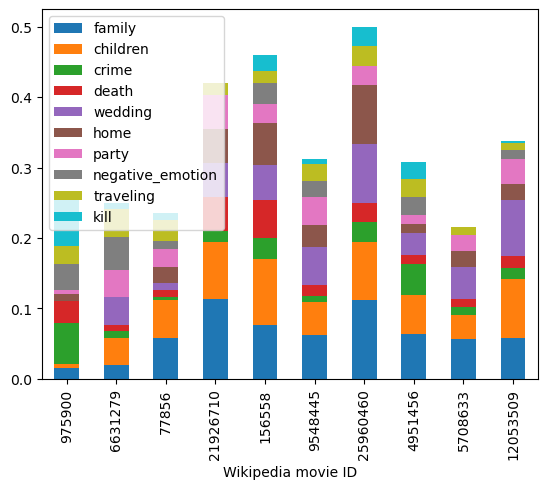

In [5]:
empath_df[top_categories][:10].plot.bar(stacked=True)

In [6]:
# We look at who's more deadly 
top_deadly_movies = empath_df["death"].sort_values(ascending=False).index
top_deadly_movies

Index([27937333, 22348404, 14881706, 19155004,  2372198, 27904601, 10685113,
        6714641,  5747187, 31061078,
       ...
          73392, 15565499,  2735755, 16877347, 23176545, 12291803,  7503887,
       10296157,   533767, 35228177],
      dtype='int64', name='Wikipedia movie ID', length=17064)

<Axes: xlabel='Wikipedia movie ID'>

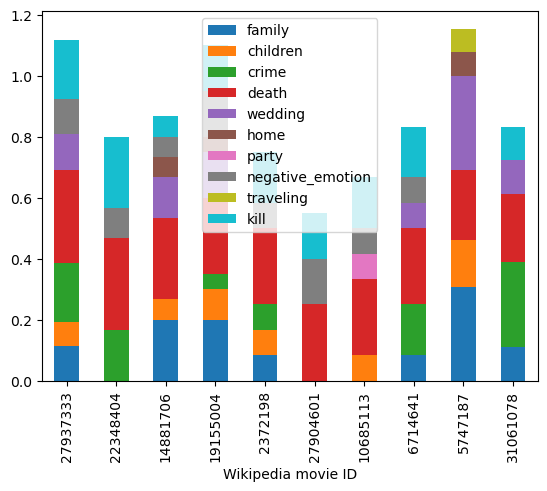

In [7]:
# We look the proportion of deadly in the movies that are classified as most deadly (above) -> still using the same 10 most categories
empath_df.sort_values(by="death", ascending=False)[top_categories][:10].plot.bar(stacked=True)

<Axes: xlabel='Wikipedia movie ID'>

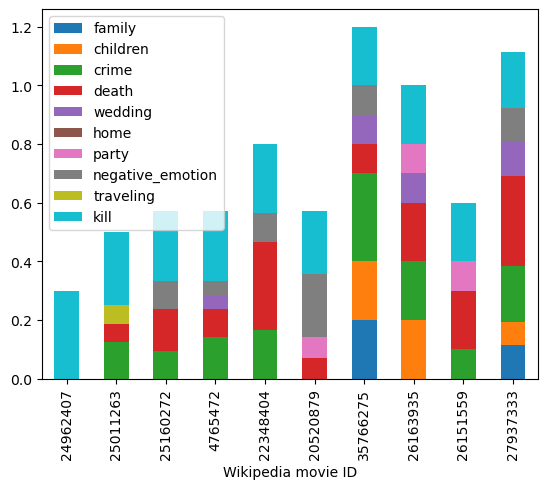

In [8]:
# We do the same but here we use "kill" as category to sort by
empath_df.sort_values(by="kill", ascending=False)[top_categories][:10].plot.bar(stacked=True)

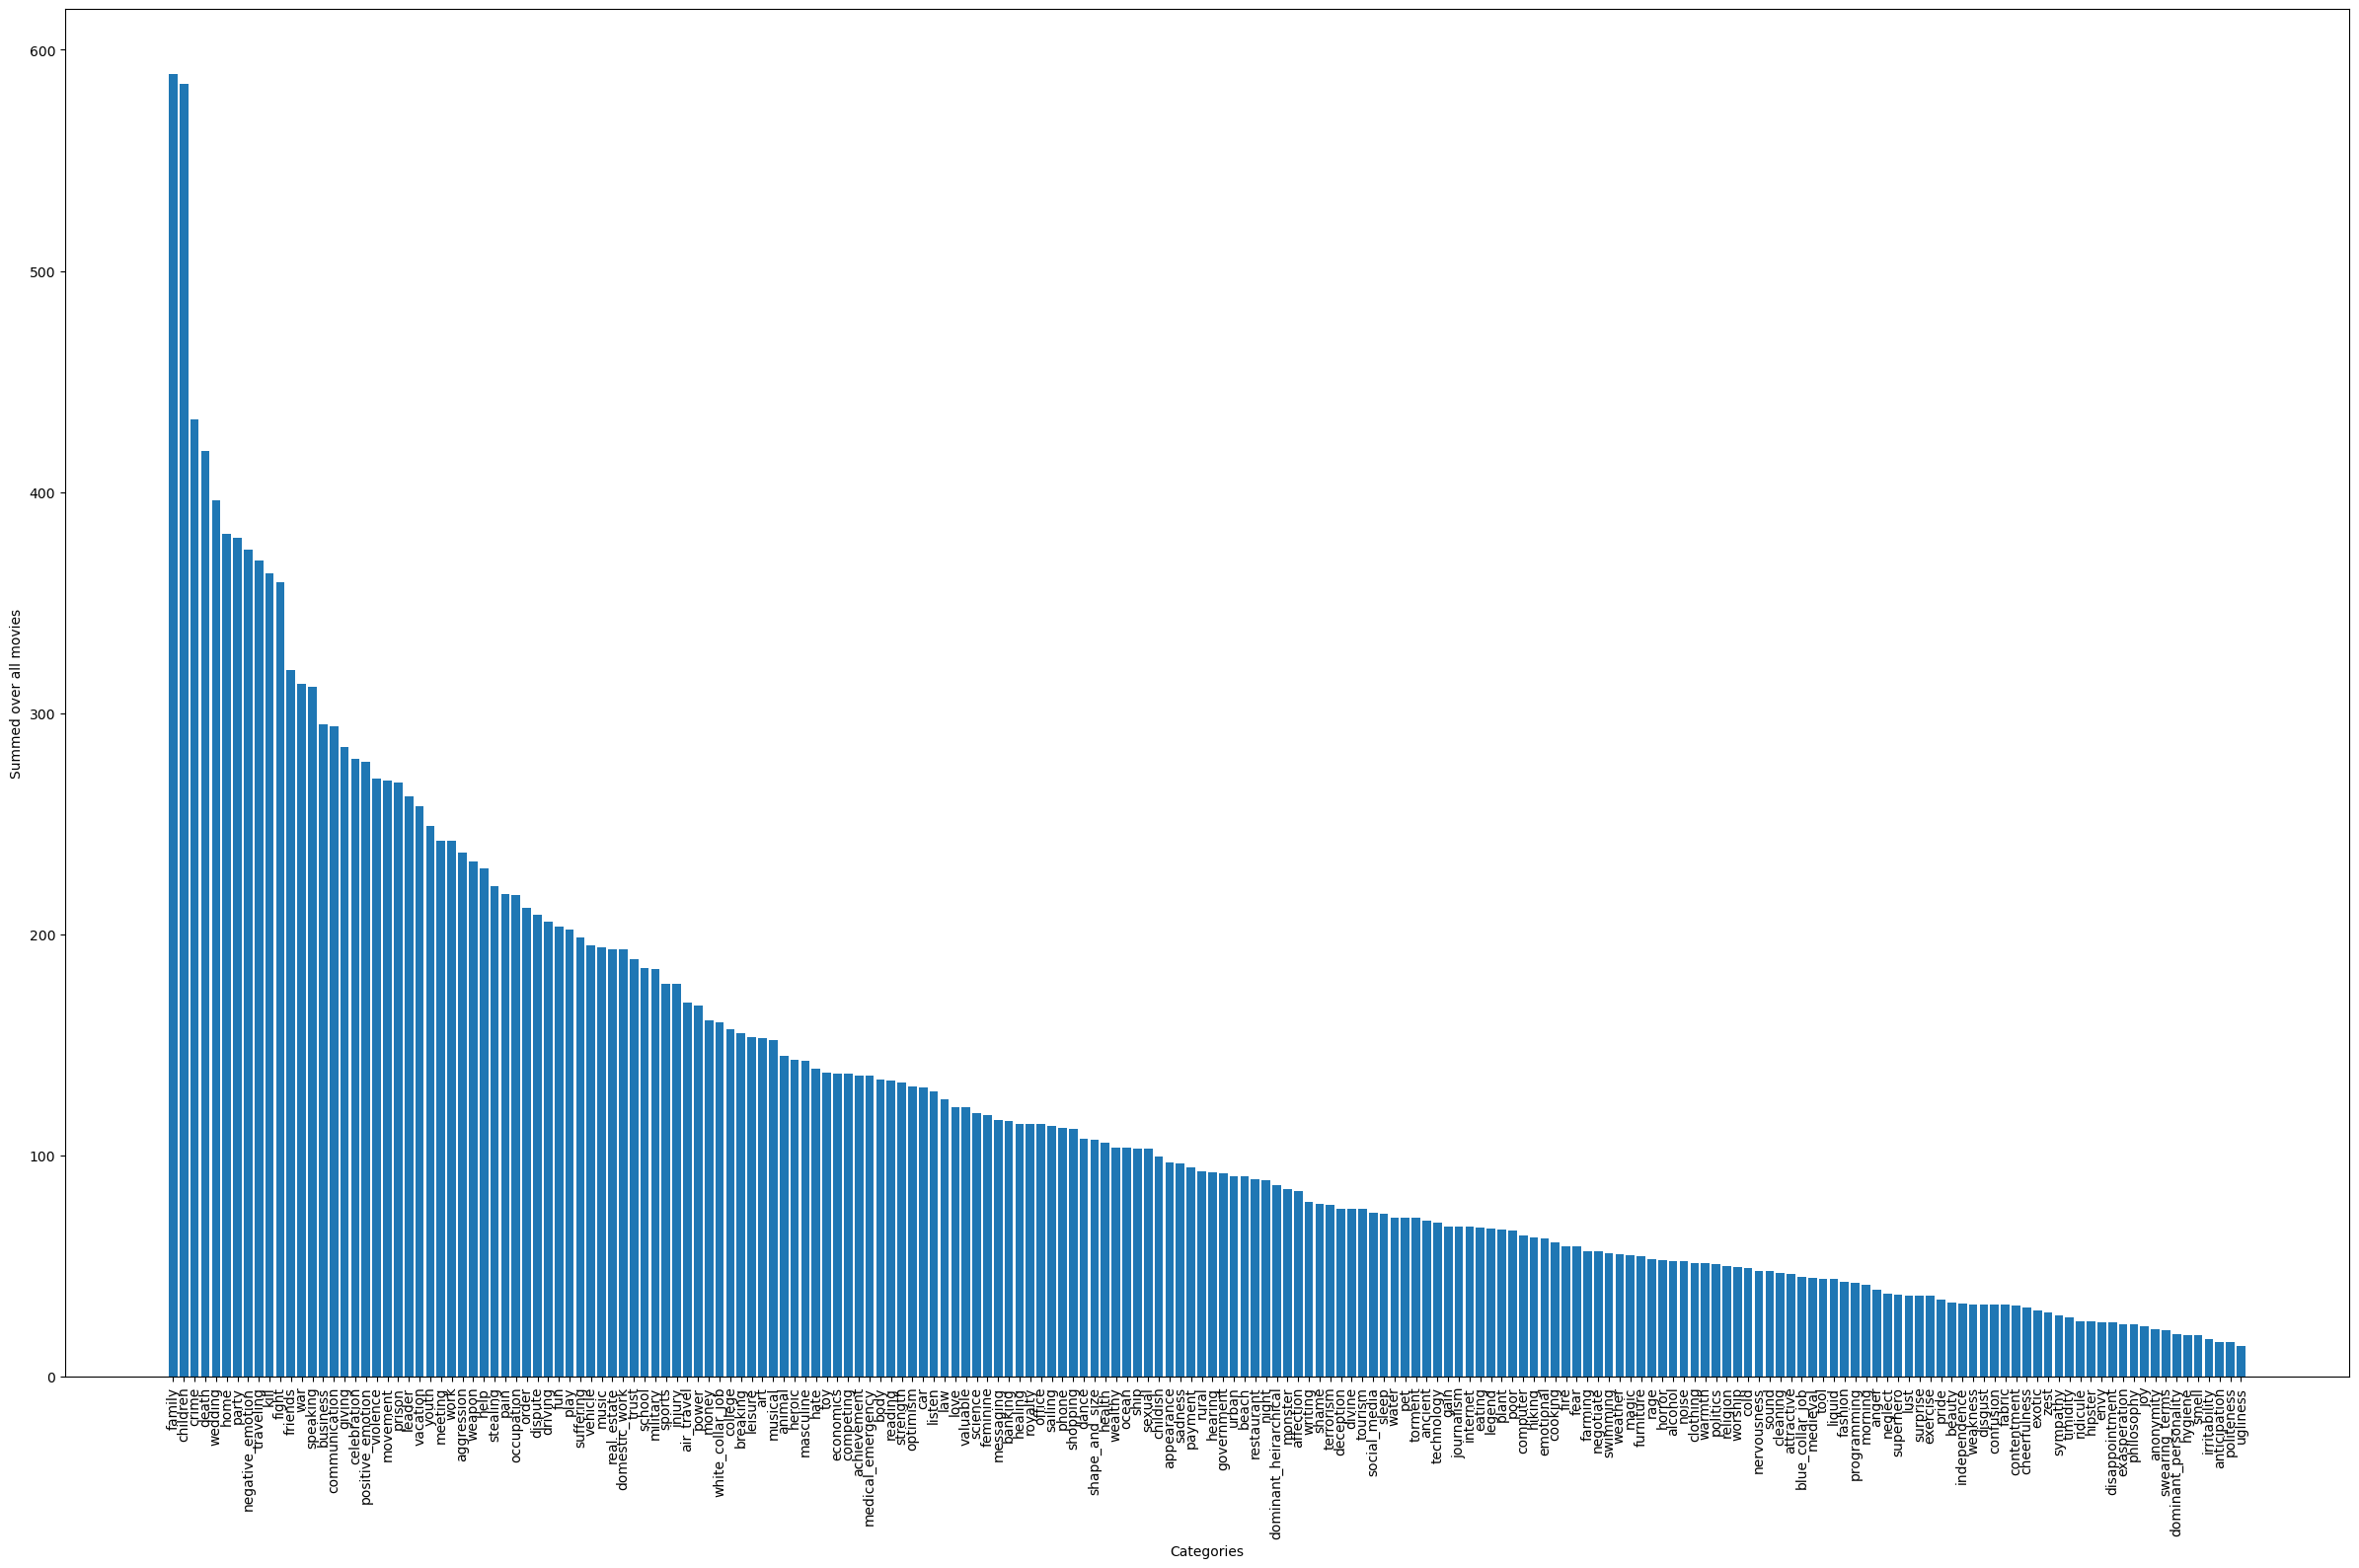

In [9]:
# Histogram for all categories

sorted_categories = empath_df.sum(axis=0).sort_values(ascending=False)

plt.figure(figsize=(24, 16))
plt.bar(sorted_categories.index, sorted_categories.values)
plt.xlabel("Categories")
plt.ylabel("Summed over all movies")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
# Quest-ce qui ferait du sens? Regarder les movies de Jade et voir si les categories qui ressortent le plus sont coherentes avec la calssification de Chat

<Axes: xlabel='Wikipedia movie ID'>

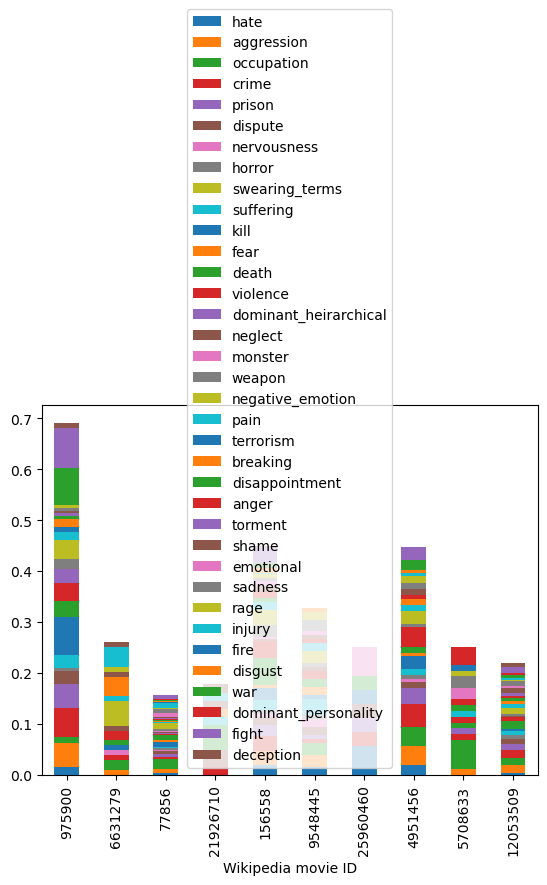

In [11]:
empath_df[violent_categories][:10].plot.bar(stacked=True)

<Axes: >

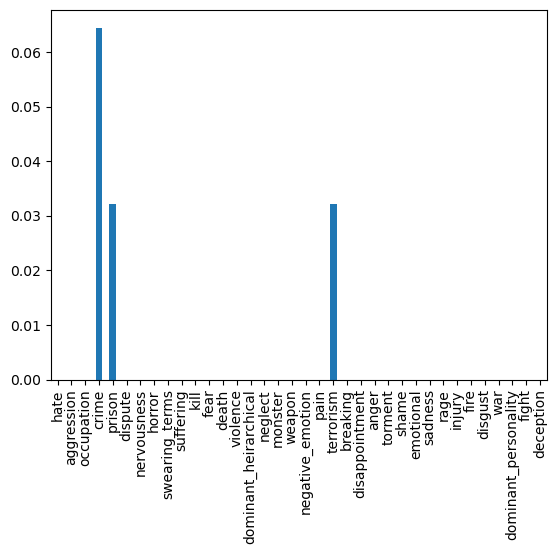

In [12]:
# Let's check for a movie that is known to be violent

empath_df[violent_categories].loc[28074095].plot.bar(stacked=True)

<Axes: >

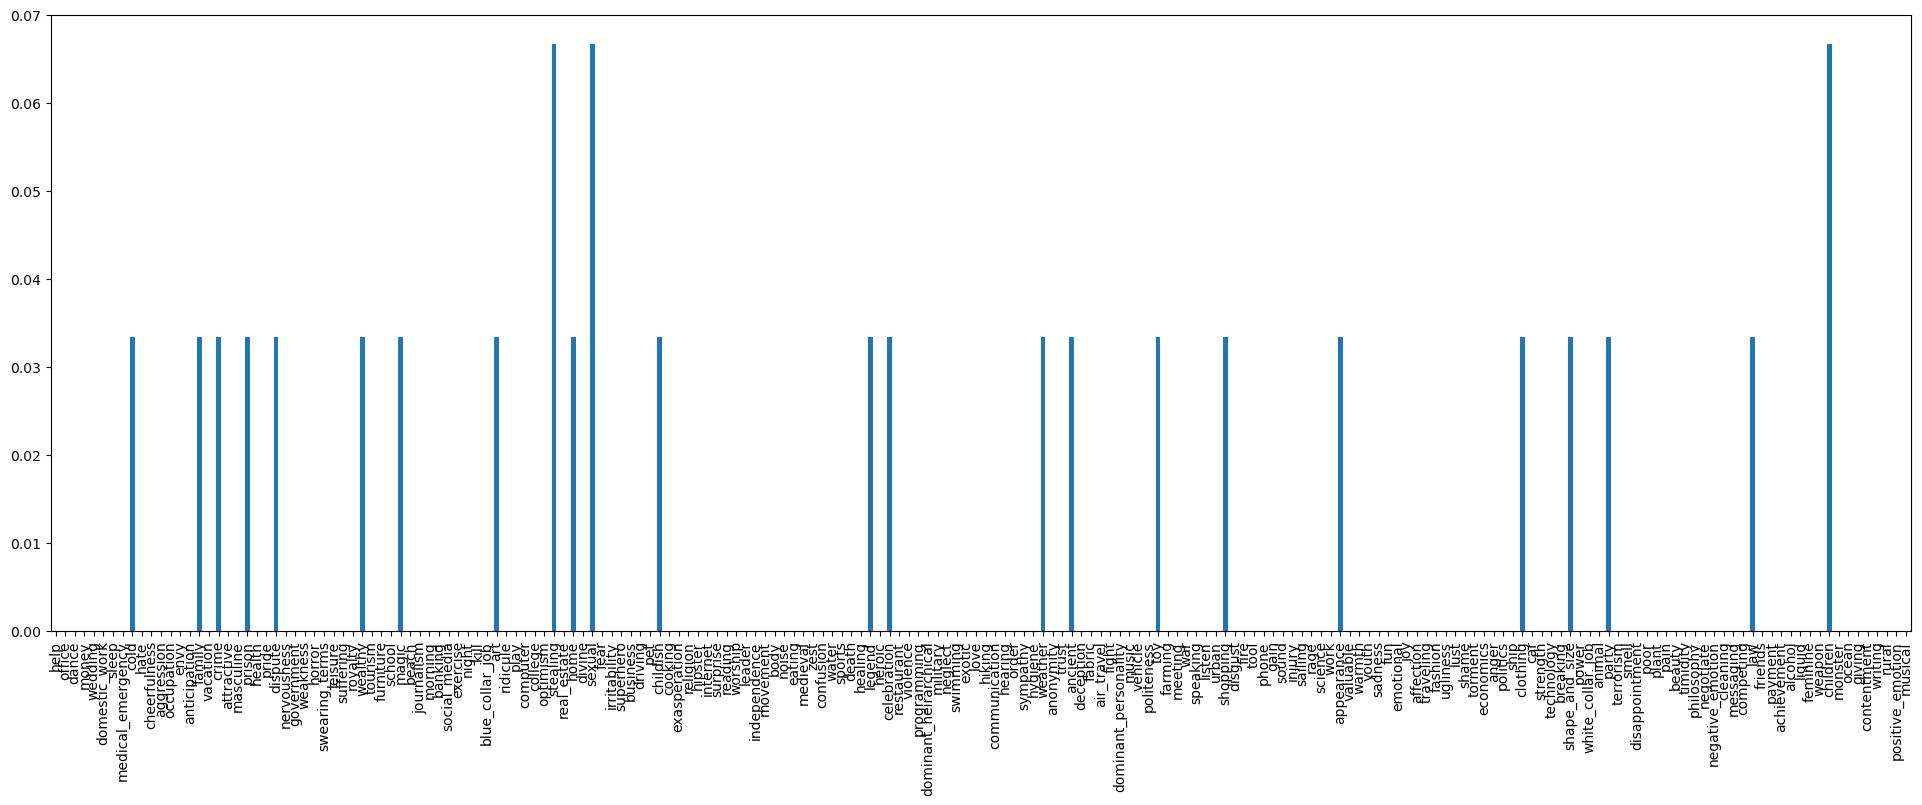

In [13]:
plt.figure(figsize=(24, 8))
empath_df.loc[3477618].plot.bar(stacked=True)

In [14]:
empath_df_non_normalized = pd.read_csv('../data/CLEAN/empath_features_matrix_norm.tsv', index_col=0)
empath_df_non_normalized

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
Wikipedia movie ID,,,,,,,,,,,,,,,,,,,,,
975900,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,...,4.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0
6631279,1.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,...,0.0,4.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0
77856,4.0,2.0,6.0,36.0,7.0,19.0,4.0,3.0,6.0,2.0,...,3.0,40.0,2.0,1.0,19.0,0.0,6.0,3.0,13.0,8.0
21926710,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0
156558,5.0,3.0,0.0,3.0,15.0,6.0,0.0,1.0,2.0,6.0,...,7.0,28.0,1.0,0.0,2.0,1.0,0.0,5.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25011340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7761830,6.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,...,4.0,4.0,5.0,12.0,3.0,0.0,0.0,3.0,1.0,1.0
1918494,1.0,1.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,1.0,...,1.0,2.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0


In [15]:
empath_df_non_normalized.index = Movie_Data["Wikipedia movie ID"]
empath_df_non_normalized

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
Wikipedia movie ID,,,,,,,,,,,,,,,,,,,,,
975900,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,...,4.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0
6631279,1.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,...,0.0,4.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0
77856,4.0,2.0,6.0,36.0,7.0,19.0,4.0,3.0,6.0,2.0,...,3.0,40.0,2.0,1.0,19.0,0.0,6.0,3.0,13.0,8.0
21926710,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0
156558,5.0,3.0,0.0,3.0,15.0,6.0,0.0,1.0,2.0,6.0,...,7.0,28.0,1.0,0.0,2.0,1.0,0.0,5.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25011340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7761830,6.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,...,4.0,4.0,5.0,12.0,3.0,0.0,0.0,3.0,1.0,1.0
1918494,1.0,1.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,1.0,...,1.0,2.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0


Explained Variance by Component: [0.34098915 0.10095664 0.04352726 0.0354788  0.03368977 0.02763568
 0.0215031  0.01949438 0.01754422 0.01726511]


<Axes: xlabel='PCA1', ylabel='PCA2'>

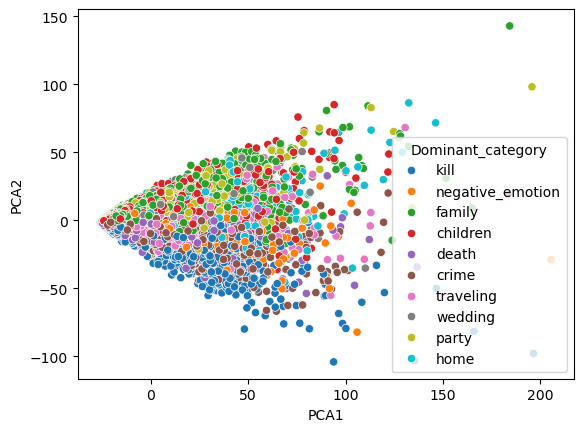

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(empath_df_non_normalized)

pca = PCA(n_components=10)
principal_components = pca.fit_transform(empath_df_non_normalized)

pca_df = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10"])

pca_df.index = Movie_Data["Wikipedia movie ID"] # make sure they don't change the order
pca_df["Dominant_category"] = empath_df_non_normalized[top_categories].idxmax(axis=1)
#display(pca_df)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Component:", explained_variance)

""" plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], cmap = pca_df["Dominant_category"])
plt.title("PCA of Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show() """

sns.scatterplot(pca_df, x="PCA1", y="PCA2", hue="Dominant_category")


<Axes: xlabel='PCA1', ylabel='PCA2'>

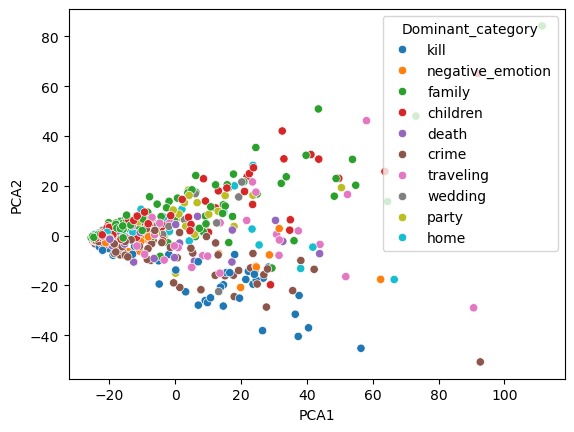

In [17]:
# on en fait seulement 500 pour être sûr qu'il n'y en ait pas de cachés en dessous
sns.scatterplot(pca_df[:500], x="PCA1", y="PCA2", hue="Dominant_category")

### Let's now work on the LLM result

In [18]:
LLM_results_df = pd.read_csv('../data/CLEAN/classification_result/LLm_result.csv')
LLM_results_df.index = LLM_results_df["Wikipedia movie ID"]
LLM_results_df.drop(columns=["Wikipedia movie ID"], inplace=True)
LLM_results_df

,Result,Prediction
Wikipedia movie ID,,
975900,Violent,1.0
6631279,Peaceful,-1.0
77856,Peaceful,-1.0
21926710,Peaceful,-1.0
156558,Violent,1.0
...,...,...
25011340,Violent,1.0
7761830,Mild,0.0
1918494,Mild,0.0


In [19]:
LLM_results_df_violent = LLM_results_df[LLM_results_df["Prediction"] == 1.0]
LLM_results_df_violent

,Result,Prediction
Wikipedia movie ID,,
975900,Violent,1.0
156558,Violent,1.0
4951456,Violent,1.0
1369204,Violent,1.0
2647998,Violent,1.0
...,...,...
18046658,Violent,1.0
2472440,Violent,1.0
454812,Violent,1.0


In [20]:
violent_merged = empath_df_non_normalized.merge(LLM_results_df_violent, how='left', on='Wikipedia movie ID')
violent_merged

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Result,Prediction
Wikipedia movie ID,,,,,,,,,,,,,,,,,,,,,
975900,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,...,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,Violent,1.0
6631279,1.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0,NaN,NaN
77856,4.0,2.0,6.0,36.0,7.0,19.0,4.0,3.0,6.0,2.0,...,2.0,1.0,19.0,0.0,6.0,3.0,13.0,8.0,NaN,NaN
21926710,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,NaN,NaN
156558,5.0,3.0,0.0,3.0,15.0,6.0,0.0,1.0,2.0,6.0,...,1.0,0.0,2.0,1.0,0.0,5.0,5.0,1.0,Violent,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25011340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Violent,1.0
7761830,6.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,...,5.0,12.0,3.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN
1918494,1.0,1.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN


In [21]:
violent_merged_copy = violent_merged.copy()
violent_merged_copy.dropna(inplace=True)
violent_merged_copy.drop(columns=["Result", "Prediction"], inplace=True)
violent_merged_copy

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
Wikipedia movie ID,,,,,,,,,,,,,,,,,,,,,
975900,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,...,4.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0
156558,5.0,3.0,0.0,3.0,15.0,6.0,0.0,1.0,2.0,6.0,...,7.0,28.0,1.0,0.0,2.0,1.0,0.0,5.0,5.0,1.0
4951456,3.0,0.0,0.0,2.0,5.0,3.0,0.0,1.0,0.0,3.0,...,1.0,9.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0
1369204,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2647998,4.0,0.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,...,1.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18046658,2.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2472440,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,...,6.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,2.0
454812,4.0,0.0,0.0,0.0,3.0,4.0,1.0,2.0,1.0,1.0,...,2.0,5.0,4.0,2.0,0.0,0.0,1.0,2.0,7.0,1.0


<Axes: xlabel='Wikipedia movie ID'>

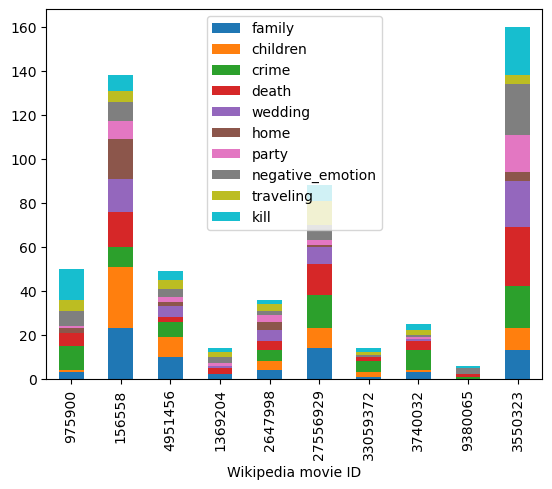

In [22]:
violent_merged_copy[top_categories][:10].plot.bar(stacked=True)

<Axes: xlabel='Wikipedia movie ID'>

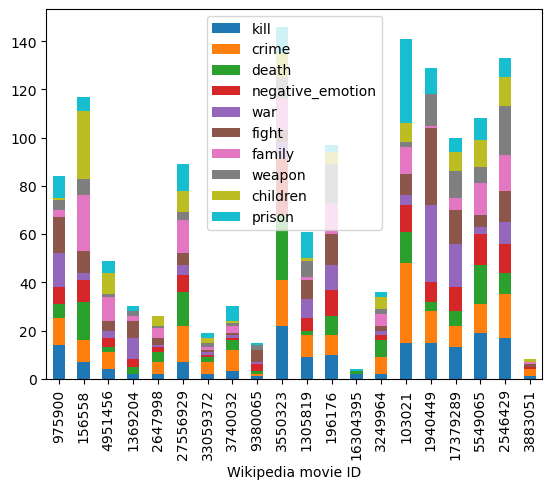

In [23]:
top_categories_violent = violent_merged_copy.sum(axis=0).sort_values(ascending=False).head(10).index
violent_merged_copy[top_categories_violent][:20].plot.bar(stacked=True)

### Movie dataframe 

In [24]:
LLM_results_df_nonviolent = LLM_results_df[LLM_results_df["Prediction"] == -1.0]
LLM_results_df_nonviolent

,Result,Prediction
Wikipedia movie ID,,
6631279,Peaceful,-1.0
77856,Peaceful,-1.0
21926710,Peaceful,-1.0
9548445,Peaceful,-1.0
25960460,Peaceful,-1.0
...,...,...
12696181,Peaceful,-1.0
4492078,Peaceful,-1.0
30553937,Peaceful,-1.0


In [25]:
nonviolent_merged = empath_df_non_normalized.merge(LLM_results_df_nonviolent, how='left', on='Wikipedia movie ID')
nonviolent_merged

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Result,Prediction
Wikipedia movie ID,,,,,,,,,,,,,,,,,,,,,
975900,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,...,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
6631279,1.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0,Peaceful,-1.0
77856,4.0,2.0,6.0,36.0,7.0,19.0,4.0,3.0,6.0,2.0,...,2.0,1.0,19.0,0.0,6.0,3.0,13.0,8.0,Peaceful,-1.0
21926710,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,Peaceful,-1.0
156558,5.0,3.0,0.0,3.0,15.0,6.0,0.0,1.0,2.0,6.0,...,1.0,0.0,2.0,1.0,0.0,5.0,5.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25011340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
7761830,6.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,...,5.0,12.0,3.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN
1918494,1.0,1.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN


In [26]:
nonviolent_merged_copy = nonviolent_merged.copy()
nonviolent_merged_copy.dropna(inplace=True)
nonviolent_merged_copy.drop(columns=["Result", "Prediction"], inplace=True)
nonviolent_merged_copy

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
Wikipedia movie ID,,,,,,,,,,,,,,,,,,,,,
6631279,1.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,...,0.0,4.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0
77856,4.0,2.0,6.0,36.0,7.0,19.0,4.0,3.0,6.0,2.0,...,3.0,40.0,2.0,1.0,19.0,0.0,6.0,3.0,13.0,8.0
21926710,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0
9548445,3.0,0.0,0.0,1.0,7.0,1.0,0.0,0.0,0.0,2.0,...,1.0,6.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0
25960460,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12696181,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4492078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
30553937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='Wikipedia movie ID'>

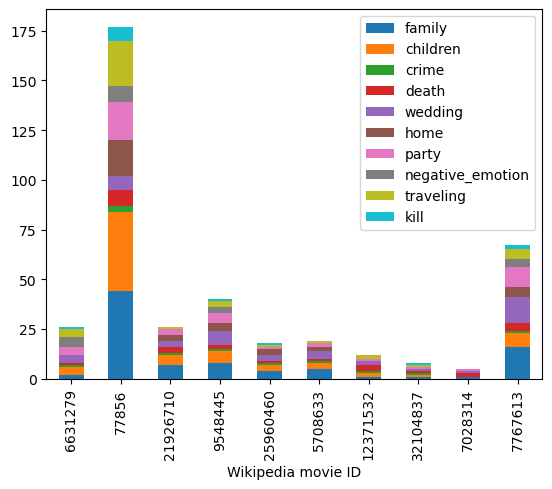

In [27]:
nonviolent_merged_copy[top_categories][:10].plot.bar(stacked=True)

<Axes: xlabel='Wikipedia movie ID'>

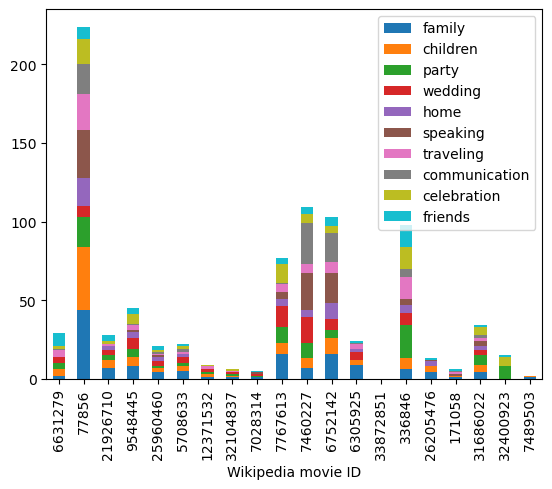

In [28]:
top_categories_nonviolent = nonviolent_merged_copy.sum(axis=0).sort_values(ascending=False).head(10).index
nonviolent_merged_copy[top_categories_nonviolent][:20].plot.bar(stacked=True)

In [29]:
LLM_results_df_mild = LLM_results_df[LLM_results_df["Prediction"] == 0.0]
LLM_results_df_mild

,Result,Prediction
Wikipedia movie ID,,
12053509,Mild,0.0
5664529,Mild,0.0
5894429,Mild,0.0
12788657,Mild,0.0
2154704,Mild,0.0
...,...,...
11350779,Mild,0.0
1673588,Mild,0.0
22330502,Mild,0.0


In [30]:
mild_merged = empath_df_non_normalized.merge(LLM_results_df_mild, how='left', on='Wikipedia movie ID')
mild_merged

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Result,Prediction
Wikipedia movie ID,,,,,,,,,,,,,,,,,,,,,
975900,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,...,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
6631279,1.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0,NaN,NaN
77856,4.0,2.0,6.0,36.0,7.0,19.0,4.0,3.0,6.0,2.0,...,2.0,1.0,19.0,0.0,6.0,3.0,13.0,8.0,NaN,NaN
21926710,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,NaN,NaN
156558,5.0,3.0,0.0,3.0,15.0,6.0,0.0,1.0,2.0,6.0,...,1.0,0.0,2.0,1.0,0.0,5.0,5.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25011340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
7761830,6.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,...,5.0,12.0,3.0,0.0,0.0,3.0,1.0,1.0,Mild,0.0
1918494,1.0,1.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0,Mild,0.0


In [31]:
mild_merged_copy = mild_merged.copy()
mild_merged_copy.dropna(inplace=True)
mild_merged_copy.drop(columns=["Result", "Prediction"], inplace=True)
mild_merged_copy

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
Wikipedia movie ID,,,,,,,,,,,,,,,,,,,,,
12053509,4.0,1.0,1.0,8.0,25.0,3.0,2.0,2.0,0.0,1.0,...,1.0,26.0,0.0,0.0,20.0,1.0,1.0,1.0,2.0,0.0
5664529,1.0,1.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,1.0,...,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
5894429,3.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,...,3.0,10.0,0.0,0.0,1.0,0.0,2.0,1.0,9.0,0.0
12788657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2154704,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11350779,6.0,3.0,3.0,1.0,5.0,2.0,1.0,3.0,2.0,3.0,...,8.0,3.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,3.0
1673588,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0
22330502,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0


<Axes: xlabel='Wikipedia movie ID'>

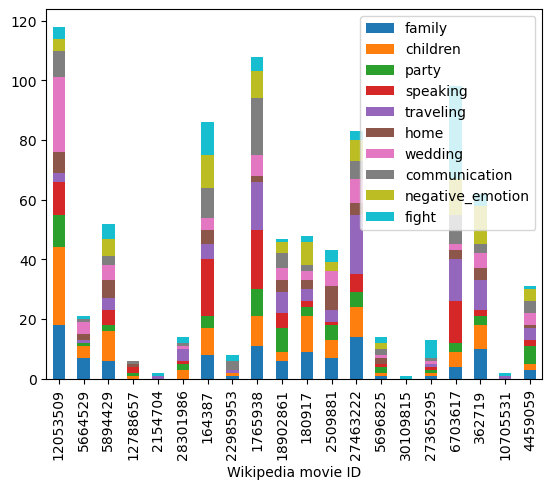

In [32]:
top_categories_mild = mild_merged_copy.sum(axis=0).sort_values(ascending=False).head(10).index
mild_merged_copy[top_categories_mild][:20].plot.bar(stacked=True)

In [33]:
LLM_results_df_nonviolent = LLM_results_df[LLM_results_df["Prediction"] == -1.0]
LLM_results_df_nonviolent

,Result,Prediction
Wikipedia movie ID,,
6631279,Peaceful,-1.0
77856,Peaceful,-1.0
21926710,Peaceful,-1.0
9548445,Peaceful,-1.0
25960460,Peaceful,-1.0
...,...,...
12696181,Peaceful,-1.0
4492078,Peaceful,-1.0
30553937,Peaceful,-1.0


Explained Variance by Component: [0.36732509 0.06427851 0.04783398 0.03899608 0.03365892 0.02506007
 0.02223626 0.02163384 0.0195152  0.01791273]


<Axes: xlabel='PCA1', ylabel='PCA2'>

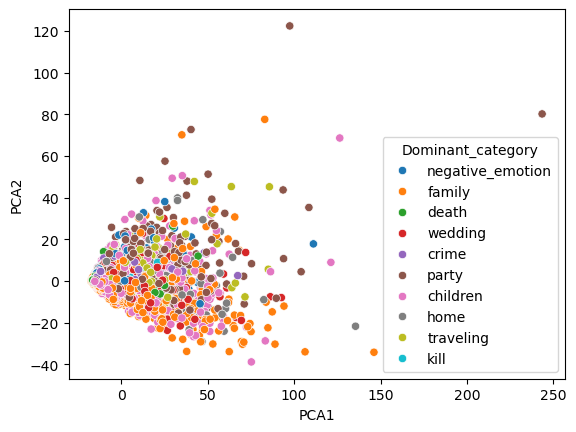

In [34]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nonviolent_merged_copy)

pca = PCA(n_components=10)
principal_components = pca.fit_transform(nonviolent_merged_copy)

pca_df = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10"])

pca_df.index = nonviolent_merged_copy.index # make sure they don't change the order
pca_df["Dominant_category"] = nonviolent_merged_copy[top_categories].idxmax(axis=1)
#display(pca_df)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Component:", explained_variance)

""" plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], cmap = pca_df["Dominant_category"])
plt.title("PCA of Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show() """

sns.scatterplot(pca_df, x="PCA1", y="PCA2", hue="Dominant_category")


PCA -> 2 and 3 D using the labelling !

Explained Variance by Component: [0.34098915 0.10095664 0.04352726 0.0354788  0.03368977 0.02763568
 0.02150311 0.01949438 0.01754422 0.01726511]


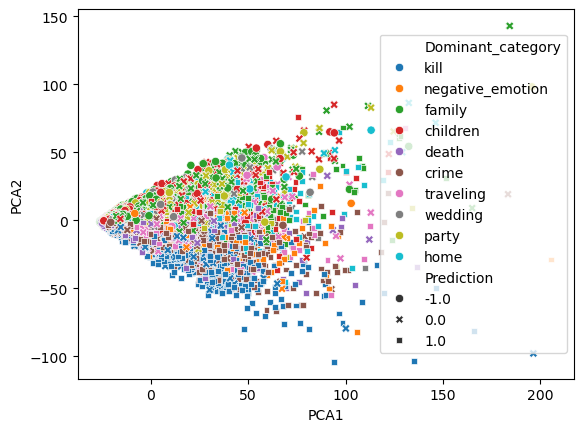

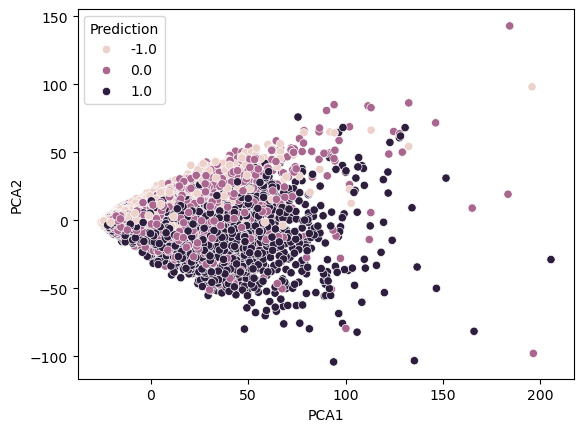

In [35]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(empath_df_non_normalized)

pca = PCA(n_components=10)
principal_components = pca.fit_transform(empath_df_non_normalized)

pca_df = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10"])

pca_df.index = Movie_Data["Wikipedia movie ID"] # make sure they don't change the order
pca_df["Dominant_category"] = empath_df_non_normalized[top_categories].idxmax(axis=1)

pca_df["Prediction"] = LLM_results_df["Prediction"]
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Component:", explained_variance)

sns.scatterplot(pca_df, x="PCA1", y="PCA2",hue="Dominant_category", style = "Prediction")
plt.show()

sns.scatterplot(pca_df, x="PCA1", y="PCA2",hue="Prediction")
plt.show()

In [36]:
pca_df["Dominant_category_cat"] = pd.Categorical(pca_df["Dominant_category"]).codes

In [37]:
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

#%matplotlib widget 

#fig, axs = plt.subplots(1, 2, figsize=(15, 7), subplot_kw={'projection': '3d'})


#axs[0].scatter3D(pca_df["PCA1"], pca_df["PCA2"], pca_df["PCA3"], c=pca_df["Prediction"])
#axs[0].set_title("3D Scatterplot classification")

    
#axs[1].scatter3D(pca_df["PCA1"], pca_df["PCA2"], pca_df["PCA3"], c=pca_df["Dominant_category_cat"])
#axs[1].set_title("3D Scatterplot categories")

# Show the plot
#plt.show()

In [38]:
import umap #pip install umap-learn

In [39]:
reducer = umap.UMAP(n_components=3)
UMAP = reducer.fit_transform(scaled_data)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


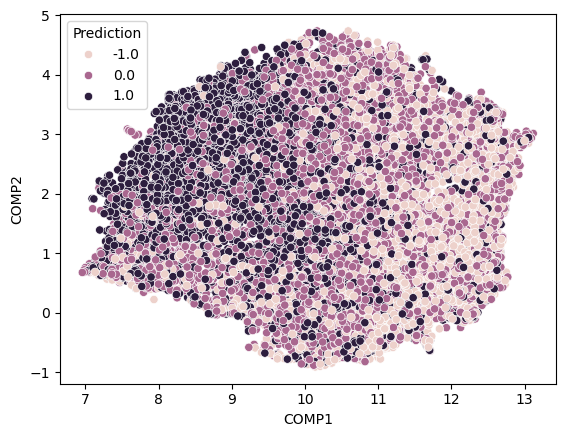

In [41]:
UMAP_df = pd.DataFrame(data=UMAP, columns=["COMP1","COMP2","COMP3"])

UMAP_df.index = Movie_Data["Wikipedia movie ID"] # make sure they don't change the order
UMAP_df["Dominant_category"] = empath_df_non_normalized[top_categories].idxmax(axis=1)

UMAP_df["Prediction"] = LLM_results_df["Prediction"]

UMAP_df["Dominant_category"] = pca_df["Dominant_category"]
sns.scatterplot(UMAP_df, x="COMP1", y="COMP2",hue="Prediction")
plt.show()

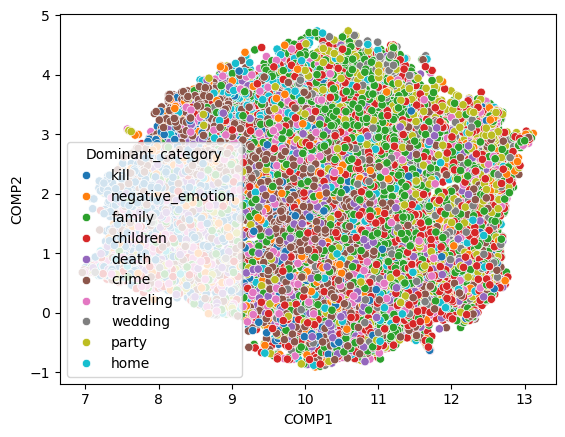

In [42]:
sns.scatterplot(UMAP_df, x="COMP1", y="COMP2",hue="Dominant_category")
plt.show()

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D

#%matplotlib widget 

#fig, axs = plt.subplots(1, 2, figsize=(15, 7), subplot_kw={'projection': '3d'})

#axs[0].scatter3D(UMAP_df["COMP1"], UMAP_df["COMP2"], UMAP_df["COMP3"], c=UMAP_df["Prediction"])

# Show the plot
#plt.show()